In [59]:
import datetime as dt
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing

# Data Input, EDA & Preprocessing

## Individual Data Input

In [60]:
price_vol = pd.read_csv('Price & Volume BTC.csv')
tweets = pd.read_csv('Tweets.csv')
funding_rates_1600 = pd.read_csv('Funding Rates BTCUSDT 1600.csv')
funding_rates_0800 = pd.read_csv('Funding Rates BTCUSDT 0800.csv')
funding_rates_0000 = pd.read_csv('Funding Rates BTCUSDT 0000.csv')
google = pd.read_csv('Google.csv')
transactions = pd.read_csv('Transactions.csv')
unique_addresses = pd.read_csv('Unique Addresses.csv')
active_addresses = pd.read_csv('../data/Active Addresses.csv')

## Data Compilation

In [61]:
# get daily ave value for twitter attributes
tweets = tweets.groupby(by="Time").mean()
tweets = tweets.reset_index()

df = pd.merge(price_vol, funding_rates_0000, on=['Time'])
df = pd.merge(df, funding_rates_0800, on=['Time'])
df = pd.merge(df, funding_rates_1600, on=['Time'])
df = pd.merge(df, google, on=['Time'])
df = pd.merge(df, active_addresses, on=['Time'])
df = pd.merge(df, unique_addresses, on=['Time'])
df = pd.merge(df, transactions, on=['Time'])
df = pd.merge(df, tweets, how="outer")
df.head()

,Time,Open,Close,High,Low,Volume,Funding Rate 0000,Funding Rate 0800,Funding Rate 1600,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions,Favorites,Retweets,Compound,Negative,Positive,Neutral
0,2022-03-03,43896.8,42456.3,44088.0,41832.0,324545814.8,0.01%,0.01%,0.01%,13.84,24.08,1011448,701198.0,268244.0,443.269231,79.576923,0.109327,0.036269,0.063731,0.900000
1,2022-03-02,44428.2,43896.9,45367.5,43332.8,340460526.5,0.00%,0.00%,0.01%,15.61,26.33,1091796,731603.0,288657.0,534.200000,90.366667,0.068437,0.037100,0.068967,0.893967
2,2022-03-01,43174.8,44428.2,44966.0,42796.9,444858241.2,-0.01%,0.01%,0.01%,17.67,29.34,1065354,722863.0,280634.0,353.514286,61.028571,0.006329,0.062714,0.070200,0.867114
3,2022-02-28,37706.7,43179.8,44210.4,37446.5,564121052.5,0.00%,-0.02%,-0.01%,16.20,24.83,981066,702483.0,270918.0,332.333333,61.861111,0.135383,0.033806,0.073306,0.892861
4,2022-02-27,39117.3,37706.7,39864.0,36977.4,388368905.7,0.01%,0.01%,0.00%,12.96,21.07,768705,583361.0,211164.0,128.000000,30.000000,0.106867,0.022667,0.055000,0.922333


In [62]:
print("Type of variables: ", "\n", df.dtypes)

Type of variables:  
 Time                        object
Open                       float64
Close                      float64
High                       float64
Low                        float64
Volume                     float64
Funding Rate 0000           object
Funding Rate 0800           object
Funding Rate 1600           object
Bitcoin_SVI                float64
Cryptocurrency_SVI         float64
No. of Active Addresses      int64
No. of Unique Addresses    float64
Transactions               float64
Favorites                  float64
Retweets                   float64
Compound                   float64
Negative                   float64
Positive                   float64
Neutral                    float64
dtype: object


# Preprocessing

## Data Type Transformation

In [63]:
# Transform object type of "Funding Rate 0000", "Funding Rate 0800" and " Funding Rate 1600" to numerical type
df['Funding Rate 0000'] = df['Funding Rate 0000'].map(lambda x: float('nan') if pd.isnull(x) else float(x.replace('%','')))
df['Funding Rate 0800'] = df['Funding Rate 0800'].map(lambda x: float('nan') if pd.isnull(x) else float(x.replace('%','')))
df['Funding Rate 1600'] = df['Funding Rate 1600'].map(lambda x: float('nan') if pd.isnull(x) else float(x.replace('%','')))

df['Month'] = df['Time'].str[:7]
df['Time'] = df['Time'].map(lambda x: int('nan') if pd.isnull(x) else int(x.replace("-", "")))
df['Month'] = df['Month'].map(lambda x: int('nan') if pd.isnull(x) else int(x.replace("-", "")))
df['FundingRate'] = (df['Funding Rate 1600'] + df['Funding Rate 0800'] + df['Funding Rate 0000'])/3 
df = df.sort_values(by = 'Time', ascending=True).reset_index(drop=True)
df.head(10)


,Time,Open,Close,High,Low,Volume,Funding Rate 0000,Funding Rate 0800,Funding Rate 1600,Bitcoin_SVI,...,No. of Unique Addresses,Transactions,Favorites,Retweets,Compound,Negative,Positive,Neutral,Month,FundingRate
0,20200304,8761.2,8750.7,8847.1,8655.7,1.221924e+07,0.01,0.01,0.01,8.64,...,625096.0,358745.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.010000
1,20200305,8750.8,9056.9,9153.1,8750.7,1.521845e+07,0.02,0.01,0.02,9.26,...,603996.0,349529.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.016667
2,20200306,9056.2,9134.3,9168.7,8989.1,8.833555e+06,0.02,0.02,0.02,8.95,...,601698.0,338383.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.020000
3,20200307,9133.9,8889.9,9184.9,8789.8,7.525135e+06,0.04,0.04,0.03,7.10,...,526880.0,313312.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.036667
4,20200308,8889.9,8036.5,8889.9,8001.1,1.439716e+07,0.03,0.05,0.05,8.02,...,501571.0,302694.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.043333
5,20200309,8035.0,7931.3,8175.2,7636.3,2.070482e+07,0.04,0.01,0.01,16.05,...,606002.0,348211.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.020000
6,20200310,7931.4,7895.3,8147.1,7736.9,1.365059e+07,0.01,0.01,0.01,12.34,...,601526.0,329698.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.010000
7,20200311,7895.4,7933.2,8000.0,7590.0,1.145017e+07,0.01,0.01,0.01,10.49,...,528053.0,287492.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,0.010000
8,20200312,7933.2,4802.9,7960.4,4448.6,5.524836e+07,0.02,0.01,0.01,22.83,...,653156.0,349978.0,5.0,2.0,0.0772,0.091,0.1,0.809,202003,0.013333
9,20200313,4811.8,5576.3,5950.0,3800.0,6.423345e+07,-0.02,-0.02,-0.30,30.86,...,NaN,276798.0,NaN,NaN,NaN,NaN,NaN,NaN,202003,-0.113333


## Handle Missing Data

In [64]:
# Count missing value
print(df.isna().sum())

Time                         0
Open                         0
Close                        0
High                         0
Low                          0
Volume                       0
Funding Rate 0000            0
Funding Rate 0800            0
Funding Rate 1600            0
Bitcoin_SVI                  0
Cryptocurrency_SVI           0
No. of Active Addresses      0
No. of Unique Addresses      2
Transactions                 0
Favorites                  458
Retweets                   458
Compound                   458
Negative                   458
Positive                   458
Neutral                    458
Month                        0
FundingRate                  0
dtype: int64


### Monthly Sentiment Analysis

In [65]:
tweets.insert(1, "Month", "NaN")

tweets['Month'] = tweets['Time'].str[:7]
tweets['Month'] = tweets['Month'].map(lambda x: int('nan') if pd.isnull(x) else int(x.replace("-", "")))
tweets.head(10)

,Time,Month,Favorites,Retweets,Compound,Negative,Positive,Neutral
0,2020-03-12,202003,5.0,2.0,0.0772,0.091,0.100,0.809
1,2020-03-17,202003,98.0,96.0,0.4019,0.000,0.114,0.886
2,2020-03-20,202003,125.0,95.0,0.4767,0.000,0.146,0.854
3,2020-03-30,202003,3.0,0.0,0.0803,0.061,0.071,0.869
4,2020-03-31,202003,186.0,142.0,0.6597,0.000,0.278,0.722
5,2020-04-01,202004,171.0,120.0,0.5267,0.061,0.184,0.754
6,2020-04-16,202004,419.0,94.0,0.0000,0.000,0.000,1.000
7,2020-04-22,202004,73.0,18.0,0.3182,0.000,0.084,0.916
8,2020-04-30,202004,994.0,153.0,0.0000,0.000,0.000,1.000
9,2020-05-09,202005,35.0,2.0,0.0000,0.000,0.000,1.000


In [66]:
tweets = tweets.groupby(by="Month").mean()
tweets = tweets.reset_index()

In [67]:
tweets.head(10)

,Month,Favorites,Retweets,Compound,Negative,Positive,Neutral
0,202003,83.400000,67.000000,0.339160,0.030400,0.141800,0.828000
1,202004,414.250000,96.250000,0.211225,0.015250,0.067000,0.917500
2,202005,283.285714,49.142857,0.002414,0.027857,0.057429,0.914571
3,202006,232.000000,155.000000,0.401900,0.000000,0.072000,0.928000
4,202007,303.750000,79.000000,0.227450,0.000000,0.065250,0.934750
5,202008,1103.925926,241.740741,0.379407,0.016296,0.146444,0.837407
6,202009,63.500000,17.000000,0.121117,0.000000,0.035000,0.965000
7,202010,300.000000,50.000000,0.405267,0.000000,0.146000,0.854000
8,202011,254.666667,37.833333,0.117625,0.049250,0.123000,0.827750
9,202012,487.428571,56.571429,0.133693,0.058571,0.110143,0.831286


In [68]:
overall_df = pd.DataFrame(columns = ['Time', 'Month', 'Compound', \
                                 'Close', 'Volume', 'FundingRate', \
                             'Bitcoin_SVI', 'Cryptocurrency_SVI',  'No. of Active Addresses', \
                                 'No. of Unique Addresses', 'Transactions'])

for i, row in df.iterrows():
    if (pd.isna(df.loc[i].at["Favorites"])):
        data = tweets[tweets['Month'] == df.loc[i].at["Month"]]
        new_row = {'Time': df.loc[i].at["Time"], 'Month': df.loc[i].at["Month"],  'Compound': data.Compound.values[0], \
                    
                 'Close': df.loc[i].at["Close"], 'Volume': df.loc[i].at["Volume"], 'FundingRate': df.loc[i].at["FundingRate"], \
                  'Bitcoin_SVI': df.loc[i].at["Bitcoin_SVI"], \
                   'Cryptocurrency_SVI': df.loc[i].at["Cryptocurrency_SVI"], 'No. of Active Addresses': df.loc[i].at["No. of Active Addresses"], 'No. of Unique Addresses': df.loc[i].at["No. of Unique Addresses"], \
                   'Transactions': df.loc[i].at["Transactions"]}
        overall_df = overall_df.append(new_row, ignore_index=True)
    else:
        new_row = {'Time': df.loc[i].at["Time"], 'Month': df.loc[i].at["Month"], 'Compound': df.loc[i].at["Compound"], \
                  
                 'Close': df.loc[i].at["Close"],'Volume': df.loc[i].at["Volume"], 'FundingRate': df.loc[i].at["FundingRate"], \
                  'Bitcoin_SVI': df.loc[i].at["Bitcoin_SVI"], \
                   'Cryptocurrency_SVI': df.loc[i].at["Cryptocurrency_SVI"], 'No. of Active Addresses': df.loc[i].at["No. of Active Addresses"], 'No. of Unique Addresses': df.loc[i].at["No. of Unique Addresses"], \
                   'Transactions': df.loc[i].at["Transactions"]}
        overall_df = overall_df.append(new_row, ignore_index=True)


In [69]:
overall_df = overall_df.drop(['Month'], axis = 1)
overall_df.head(10)

,Time,Compound,Close,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions
0,20200304.0,0.33916,8750.7,1.221924e+07,0.010000,8.64,4.34,857423.0,625096.0,358745.0
1,20200305.0,0.33916,9056.9,1.521845e+07,0.016667,9.26,3.76,793221.0,603996.0,349529.0
2,20200306.0,0.33916,9134.3,8.833555e+06,0.020000,8.95,3.33,804945.0,601698.0,338383.0
3,20200307.0,0.33916,8889.9,7.525135e+06,0.036667,7.10,3.04,682432.0,526880.0,313312.0
4,20200308.0,0.33916,8036.5,1.439716e+07,0.043333,8.02,4.34,654911.0,501571.0,302694.0
5,20200309.0,0.33916,7931.3,2.070482e+07,0.020000,16.05,5.16,809850.0,606002.0,348211.0
6,20200310.0,0.33916,7895.3,1.365059e+07,0.010000,12.34,4.44,807778.0,601526.0,329698.0
7,20200311.0,0.33916,7933.2,1.145017e+07,0.010000,10.49,4.23,728889.0,528053.0,287492.0
8,20200312.0,0.07720,4802.9,5.524836e+07,0.013333,22.83,6.20,909601.0,653156.0,349978.0
9,20200313.0,0.33916,5576.3,6.423345e+07,-0.113333,30.86,6.71,786409.0,NaN,276798.0


In [70]:


test_size = 0.2                                                # proportion of dataset to be used as test set
cv_size = 0.2                                                   # proportion of dataset to be used as cross-validation set
N = 3                                                              # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100                          # Number of boosted trees to fit. default = 100
max_depth = 3                               # Maximum tree depth for base learners. default = 3
learning_rate = 0.1                         # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1                     # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14

In [71]:
def get_mov_avg_std(df, col, N):
    """
    Given a dataframe, get mean and std dev at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        df         : dataframe. Can be of any length.
        col        : name of the column you want to calculate mean and std dev
        N          : get mean and std dev at timestep t using values from t-1, t-2, ..., t-N
    Outputs
        df_out     : same as df but with additional column containing mean and std dev
    """
    mean_list = df[col].rolling(window = N, min_periods=1).mean() 
    std_list = df[col].rolling(window = N, min_periods=1).std()   
    
    # Add one timestep to the predictions
    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))
    
    # Append mean_list to df
    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list
    
    return df_out

In [72]:
overall_df = get_mov_avg_std(overall_df, 'Close',N)

Text(0.5, 1.0, 'Price of BTC From 4th March 2020 to 3rd March 2022')

<Figure size 1440x720 with 0 Axes>

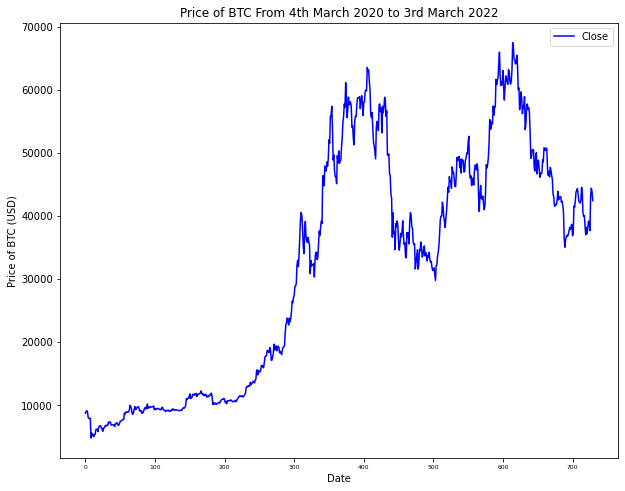

In [73]:
fig = plt.figure(figsize=(20,10))
ax  = overall_df.plot(y = 'Close', style = 'b-')
plt.xlabel('Date')
plt.xticks(fontsize=6 ) 
plt.ylabel('Price of BTC (USD)')
plt.title("Price of BTC From 4th March 2020 to 3rd March 2022")

# UP TO HERE ALL GOOD. OVERALL DF IS UPDATED AND EDITED THE FEATURES ALR

# Train-Test Split


In [74]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = overall_df[:num_train]
cv = overall_df[num_train:num_train+num_cv]
train_cv = overall_df[:num_train+num_cv]
test = overall_df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 438
num_cv = 146
num_test = 146
train.shape = (438, 12)
cv.shape = (146, 12)
train_cv.shape = (584, 12)
test.shape = (146, 12)


In [75]:
train.head()

,Time,Compound,Close,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions,Close_mean,Close_std
0,20200304.0,0.33916,8750.7,1.221924e+07,0.010000,8.64,4.34,857423.0,625096.0,358745.0,NaN,NaN
1,20200305.0,0.33916,9056.9,1.521845e+07,0.016667,9.26,3.76,793221.0,603996.0,349529.0,8750.700000,NaN
2,20200306.0,0.33916,9134.3,8.833555e+06,0.020000,8.95,3.33,804945.0,601698.0,338383.0,8903.800000,216.516096
3,20200307.0,0.33916,8889.9,7.525135e+06,0.036667,7.10,3.04,682432.0,526880.0,313312.0,8980.633333,202.853872
4,20200308.0,0.33916,8036.5,1.439716e+07,0.043333,8.02,4.34,654911.0,501571.0,302694.0,9027.033333,124.907379


In [76]:
cv.head()

,Time,Compound,Close,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions,Close_mean,Close_std
438,20210516.0,0.417171,46427.4,442072367.4,0.026667,36.0,57.0,971649.0,604353.0,219435.0,48766.433333,1726.456256
439,20210517.0,0.417171,43538.7,516079876.2,0.036667,53.0,53.0,962984.0,684281.0,250910.0,47683.766667,1882.771575
440,20210518.0,0.558925,42847.8,419737500.8,0.040000,40.0,50.0,856695.0,619246.0,221018.0,45580.500000,1776.791048
441,20210519.0,0.417171,36664.7,836064780.5,0.023333,100.0,100.0,1031147.0,734818.0,263419.0,44271.300000,1898.923671
442,20210520.0,0.371500,40530.5,508622726.6,-0.023333,79.0,61.0,943686.0,694786.0,228039.0,41017.066667,3785.057120


In [77]:
test.head()

,Time,Compound,Close,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions,Close_mean,Close_std
584,20211009.0,0.161596,54947.7,303944142.6,0.010000,13.58,34.42,991926.0,620238.0,246189.0,54347.666667,841.833655
585,20211010.0,0.161596,54663.6,415682780.3,0.016667,13.32,25.40,803826.0,536877.0,211506.0,54225.333333,631.410329
586,20211011.0,0.161596,57471.9,482625180.7,0.010000,17.08,30.08,1009017.0,676676.0,280184.0,54520.333333,514.193547
587,20211012.0,0.335250,56004.5,529269410.6,0.010000,16.39,28.74,937369.0,673664.0,274155.0,55694.400000,1545.900349
588,20211013.0,0.161596,57367.2,470511860.3,0.010000,15.03,26.07,975651.0,677323.0,288916.0,56046.666667,1404.624770


In [78]:
train_cv.head()

,Time,Compound,Close,Volume,FundingRate,Bitcoin_SVI,Cryptocurrency_SVI,No. of Active Addresses,No. of Unique Addresses,Transactions,Close_mean,Close_std
0,20200304.0,0.33916,8750.7,1.221924e+07,0.010000,8.64,4.34,857423.0,625096.0,358745.0,NaN,NaN
1,20200305.0,0.33916,9056.9,1.521845e+07,0.016667,9.26,3.76,793221.0,603996.0,349529.0,8750.700000,NaN
2,20200306.0,0.33916,9134.3,8.833555e+06,0.020000,8.95,3.33,804945.0,601698.0,338383.0,8903.800000,216.516096
3,20200307.0,0.33916,8889.9,7.525135e+06,0.036667,7.10,3.04,682432.0,526880.0,313312.0,8980.633333,202.853872
4,20200308.0,0.33916,8036.5,1.439716e+07,0.043333,8.02,4.34,654911.0,501571.0,302694.0,9027.033333,124.907379


In [79]:
# Select features, the target output is'Close'
feature_pool = train_cv.columns
#Note : Close is a feature as well 

output = 'Close'

### NaN Values

In [80]:
print(train.isna().sum())
print(test.isna().sum())
print(cv.isna().sum())
print(train_cv.isna().sum())

Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    2
Transactions               0
Close_mean                 1
Close_std                  2
dtype: int64
Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    0
Transactions               0
Close_mean                 0
Close_std                  0
dtype: int64
Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    0
Transactions     

In [81]:
KNN_miss_filling = KNNImputer(n_neighbors=2).fit(train)
train = pd.DataFrame(KNN_miss_filling.transform(train), columns=feature_pool)
test = pd.DataFrame(KNN_miss_filling.transform(test), columns=feature_pool)

KNN_miss_filling = KNNImputer(n_neighbors=2).fit(cv)
cv = pd.DataFrame(KNN_miss_filling.transform(cv), columns=feature_pool)
train_cv = pd.DataFrame(KNN_miss_filling.transform(train_cv), columns=feature_pool)

In [82]:
print(train.isna().sum())
print(test.isna().sum())
print(cv.isna().sum())
print(train_cv.isna().sum())

Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    0
Transactions               0
Close_mean                 0
Close_std                  0
dtype: int64
Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    0
Transactions               0
Close_mean                 0
Close_std                  0
dtype: int64
Time                       0
Compound                   0
Close                      0
Volume                     0
FundingRate                0
Bitcoin_SVI                0
Cryptocurrency_SVI         0
No. of Active Addresses    0
No. of Unique Addresses    0
Transactions     

## Scale the train, dev and test set

In [83]:
# Standardized features:
standardized_features = ['Compound','Volume', 'Close', 'Close_mean', 'Close_std', 'Transactions', 'No. of Active Addresses', 'No. of Unique Addresses']     
non_standardized_features = list(set(feature_pool)-set(standardized_features))
    
# Get the scaler based on train set
scaler = preprocessing.StandardScaler().fit(train[standardized_features])
print('The mean and standard deviation of training set:', scaler.mean_, scaler.scale_)

train_std=pd.DataFrame(scaler.fit_transform(train[standardized_features]))  # transform() return 'numpy.ndarray', not 'DataFrame' or 'Series'
train_nstd=pd.DataFrame(train[non_standardized_features])
train_std.columns = train_std.columns.map(lambda x: standardized_features[x])
train_std.reset_index(drop=True, inplace=True)
train_nstd.reset_index(drop=True, inplace=True)
train_scaled = pd.concat([train_std,train_nstd], sort=False,axis=1)

The mean and standard deviation of training set: [2.41341098e-01 9.54626920e+07 2.30738331e+04 2.28920158e+04
 6.16252483e+02 3.04730473e+05 9.93335228e+05 6.80755704e+05] [1.89624057e-01 1.14454553e+08 1.84582975e+04 1.83869846e+04
 7.78586846e+02 3.45272842e+04 1.53086458e+05 1.02426783e+05]


In [84]:
train_scaled.head()

,Compound,Volume,Close,Close_mean,Close_std,Transactions,No. of Active Addresses,No. of Unique Addresses,Cryptocurrency_SVI,Bitcoin_SVI,Time,FundingRate
0,0.515857,-0.727306,-0.775973,-0.802933,-0.721470,1.564401,-0.887814,-0.543410,4.34,8.64,20200304.0,0.010000
1,0.515857,-0.701101,-0.759384,-0.769094,-0.683664,1.297482,-1.307197,-0.749410,3.76,9.26,20200305.0,0.016667
2,0.515857,-0.756887,-0.755191,-0.760767,-0.513413,0.974665,-1.230613,-0.771846,3.33,8.95,20200306.0,0.020000
3,0.515857,-0.768319,-0.768431,-0.756589,-0.530960,0.248543,-2.030900,-1.502299,3.04,7.10,20200307.0,0.036667
4,0.515857,-0.708277,-0.814665,-0.754065,-0.631073,-0.058982,-2.210674,-1.749393,4.34,8.02,20200308.0,0.043333


In [85]:
# Get the scaler based on train set
scaler = preprocessing.StandardScaler().fit(cv[standardized_features])
print('The mean and standard deviation of training set:', scaler.mean_, scaler.scale_)


cv_std=pd.DataFrame(scaler.transform(cv[standardized_features]))  # transform() return 'numpy.ndarray', not 'DataFrame' or 'Series'
cv_nstd=pd.DataFrame(cv[non_standardized_features])
cv_std.columns = cv_std.columns.map(lambda x: standardized_features[x])
cv_std.reset_index(drop=True, inplace=True)
cv_nstd.reset_index(drop=True, inplace=True)
cv_scaled = pd.concat([cv_std,cv_nstd], sort=False,axis=1)
cv_scaled.head()



The mean and standard deviation of training set: [3.28614978e-01 2.85925013e+08 4.08310986e+04 4.07511388e+04
 1.21745884e+03 2.34026877e+05 8.66877952e+05 5.92385281e+05] [2.38515011e-01 1.25117583e+08 6.26059459e+03 6.01623169e+03
 7.49212678e+02 3.27185164e+04 1.06847574e+05 7.12651425e+04]


,Compound,Volume,Close,Close_mean,Close_std,Transactions,No. of Active Addresses,No. of Unique Addresses,Cryptocurrency_SVI,Bitcoin_SVI,Time,FundingRate
0,0.371281,1.248005,0.893893,1.332278,0.679376,-0.445982,0.980566,0.167932,57.0,36.0,20210516.0,0.026667
1,0.371281,1.839509,0.432483,1.152321,0.888016,0.516011,0.899469,1.289490,53.0,53.0,20210517.0,0.036667
2,0.965600,1.069494,0.322126,0.802722,0.746560,-0.397600,-0.095304,0.376912,50.0,40.0,20210518.0,0.040000
3,0.371281,4.396982,-0.665496,0.585111,0.909575,0.898333,1.537415,1.998631,100.0,100.0,20210519.0,0.023333
4,0.179800,1.779907,-0.048014,0.044202,3.427062,-0.183012,0.718856,1.436898,61.0,79.0,20210520.0,-0.023333


In [86]:
scaler = preprocessing.StandardScaler().fit(train_cv[standardized_features])
print('The mean and standard deviation of training set:', scaler.mean_, scaler.scale_)


train_cv_std=pd.DataFrame(scaler.transform(train_cv[standardized_features]))  # transform() return 'numpy.ndarray', not 'DataFrame' or 'Series'
train_cv_nstd=pd.DataFrame(train_cv[non_standardized_features])
train_cv_std.columns = train_cv_std.columns.map(lambda x: standardized_features[x])
train_cv_std.reset_index(drop=True, inplace=True)
train_cv_nstd.reset_index(drop=True, inplace=True)
train_cv_scaled = pd.concat([train_cv_std,train_cv_nstd], sort=False,axis=1)
train_cv_scaled.head()



The mean and standard deviation of training set: [2.63159568e-01 1.43078272e+08 2.75131495e+04 2.73988936e+04
 7.68384940e+02 2.87054574e+05 9.61720909e+05 6.58059510e+05] [2.06442369e-01 1.43318584e+08 1.80125765e+04 1.79395297e+04
 8.13124260e+02 4.58152547e+04 1.53065654e+05 1.03664728e+05]


,Compound,Volume,Close,Close_mean,Close_std,Transactions,No. of Active Addresses,No. of Unique Addresses,Cryptocurrency_SVI,Bitcoin_SVI,Time,FundingRate
0,0.368144,-0.913064,-1.041631,0.296233,-0.202341,1.564772,-0.681393,-0.317982,4.34,8.64,20200304.0,0.010000
1,0.368144,-0.892137,-1.024631,-1.039503,-0.202341,1.363616,-1.100834,-0.521523,3.76,9.26,20200305.0,0.016667
2,0.368144,-0.936687,-1.020334,-1.030969,-0.678702,1.120335,-1.024240,-0.543690,3.33,8.95,20200306.0,0.020000
3,0.368144,-0.945817,-1.033903,-1.026686,-0.695504,0.573115,-1.824635,-1.265421,3.04,7.10,20200307.0,0.036667
4,0.368144,-0.897868,-1.081281,-1.024099,-0.791364,0.341358,-2.004433,-1.509564,4.34,8.02,20200308.0,0.043333


In [87]:
scaler = preprocessing.StandardScaler().fit(test[standardized_features])
print('The mean and standard deviation of training set:', scaler.mean_, scaler.scale_)


test_std=pd.DataFrame(scaler.transform(test[standardized_features]))  # transform() return 'numpy.ndarray', not 'DataFrame' or 'Series'
test_nstd=pd.DataFrame(test[non_standardized_features])
test_std.columns = test_std.columns.map(lambda x: standardized_features[x])
test_std.reset_index(drop=True, inplace=True)
test_nstd.reset_index(drop=True, inplace=True)
test_scaled = pd.concat([test_std,test_nstd], sort=False,axis=1)
test_scaled.head()



The mean and standard deviation of training set: [2.57083480e-01 4.21845122e+08 4.98625705e+04 5.00112694e+04
 1.12261207e+03 2.61912212e+05 9.46499432e+05 6.67314658e+05] [2.60345420e-01 1.38674551e+08 9.13442532e+03 9.04438695e+03
 7.94835775e+02 3.01177400e+04 9.99652348e+04 5.99765513e+04]


,Compound,Volume,Close,Close_mean,Close_std,Transactions,No. of Active Addresses,No. of Unique Addresses,Cryptocurrency_SVI,Bitcoin_SVI,Time,FundingRate
0,-0.366774,-0.850199,0.556699,0.479457,-0.353253,-0.522058,0.454424,-0.784918,34.42,13.58,20211009.0,0.010000
1,-0.366774,-0.044437,0.525597,0.465931,-0.617991,-1.673639,-1.427230,-2.174811,25.40,13.32,20211010.0,0.016667
2,-0.366774,0.438293,0.833039,0.498548,-0.765464,0.606679,0.625393,0.156083,30.08,17.08,20211011.0,0.010000
3,0.300242,0.774650,0.672394,0.628360,0.532548,0.406498,-0.091336,0.105864,28.74,16.39,20211012.0,0.010000
4,-0.366774,0.350942,0.821577,0.667309,0.354806,0.896607,0.291617,0.166871,26.07,15.03,20211013.0,0.010000


In [88]:
# Update the order within feature pool
feature_pool = list(train.columns)

## Split into X and y

In [89]:
X_train = train[feature_pool]
y_train = train[output]
X_cv = cv[feature_pool]
y_cv = cv[output]
X_train_cv = train_cv[feature_pool]
y_train_cv = train_cv[output]
X_sample = test[feature_pool]
y_sample = test[output]
print(feature_pool)
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))

['Time', 'Compound', 'Close', 'Volume', 'FundingRate', 'Bitcoin_SVI', 'Cryptocurrency_SVI', 'No. of Active Addresses', 'No. of Unique Addresses', 'Transactions', 'Close_mean', 'Close_std']
X_train.shape = (438, 12)
y_train.shape = (438,)
X_cv.shape = (146, 12)
y_cv.shape = (146,)
X_train_cv.shape = (584, 12)
y_train_cv.shape = (584,)
X_sample.shape = (146, 12)
y_sample.shape = (146,)


In [90]:
X_train_scaled = train_scaled[feature_pool]
y_train_scaled = train_scaled['Close']
X_cv_scaled = cv_scaled[feature_pool]
X_train_cv_scaled = train_cv_scaled[feature_pool]
y_train_cv_scaled = train_cv_scaled['Close']
X_sample_scaled = test_scaled[feature_pool]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (438, 12)
y_train_scaled.shape = (438,)
X_cv_scaled.shape = (146, 12)
X_train_cv_scaled.shape = (584, 12)
y_train_cv_scaled.shape = (584,)
X_sample_scaled.shape = (146, 12)


## EDA

Text(0.5, 1.0, 'Before scaling')

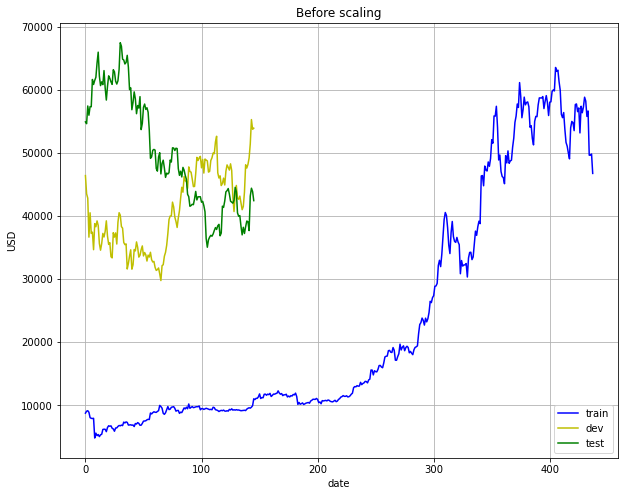

In [91]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(y='Close', style='b-', grid=True)
ax = cv.plot( y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(y='Close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Before scaling")

Text(0.5, 1.0, 'After scaling')

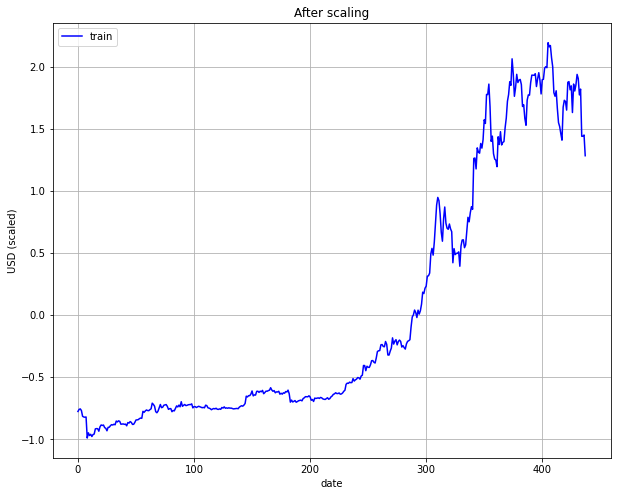

In [92]:
ax = X_train_scaled.plot(y='Close', style='b-', grid=True)
ax.legend(['train'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("After scaling")

## Creating the model

In [93]:
!pip install xgboost

from xgboost import XGBRegressor

In [94]:
# Functions

def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_pred_eval_model(X_train_scaled, \
                          y_train_scaled, \
                          X_test_scaled, \
                          y_test, \
                          col_mean, \
                          col_std, \
                          seed=100, \
                          n_estimators=100, \
                          max_depth=3, \
                          learning_rate=0.1, \
                          min_child_weight=1, \
                          subsample=1, \
                          colsample_bytree=1, \
                          colsample_bylevel=1, \
                          gamma=0):
    '''
    Train model, do prediction, scale back to original range and do evaluation
    Use XGBoost here.
    Inputs
        X_train_scaled     : features for training. Scaled to have mean 0 and variance 1
        y_train_scaled     : target for training. Scaled to have mean 0 and variance 1
        X_test_scaled      : features for test. Each sample is scaled to mean 0 and variance 1
        y_test             : target for test. Actual values, not scaled.
        col_mean           : means used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        col_std            : standard deviations used to scale each sample of X_test_scaled. Same length as X_test_scaled and y_test
        seed               : model seed
        n_estimators       : number of boosted trees to fit
        max_depth          : maximum tree depth for base learners
        learning_rate      : boosting learning rate (xgb’s “eta”)
        min_child_weight   : minimum sum of instance weight(hessian) needed in a child
        subsample          : subsample ratio of the training instance
        colsample_bytree   : subsample ratio of columns when constructing each tree
        colsample_bylevel  : subsample ratio of columns for each split, in each level
        gamma              : 
    Outputs
        rmse               : root mean square error of y_test and est
        mape               : mean absolute percentage error of y_test and est
        est                : predicted values. Same length as y_test
    '''

    model = XGBRegressor(seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)
    
    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Get predicted labels and scale back to original range
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

In [95]:
# Create the model
model = XGBRegressor(seed=model_seed,
                     n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

# Train the regressor
model.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [96]:
# Do prediction on train set
import math
from sklearn.metrics import mean_squared_error
est_scaled = model.predict(X_train_scaled)
est = est_scaled * math.sqrt(scaler.var_[0]) + scaler.mean_[0]

# Calculate RMSE
print("RMSE on train set = %0.3f" % math.sqrt(mean_squared_error(y_train, est)))

# Calculate MAPE
print("MAPE on train set = %0.3f%%" % get_mape(y_train, est))

RMSE on train set = 29548.080
MAPE on train set = 99.999%


Text(0.5, 1.0, 'Without scaling')

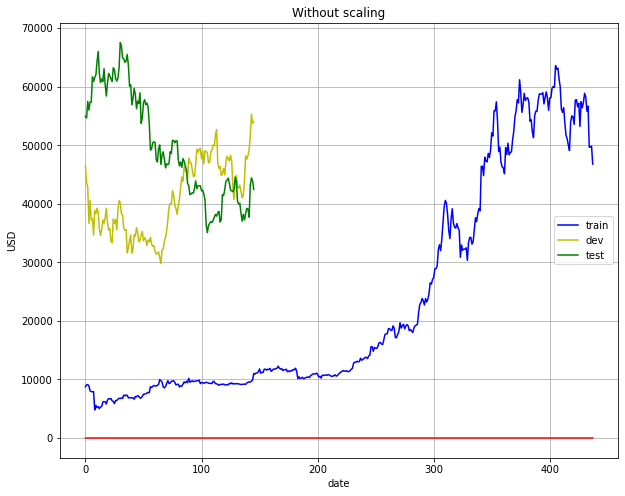

In [104]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est, 
                       'date': train['Time']})

ax = train.plot(y='Close', style='b-', grid=True)
ax = cv.plot(y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(y='Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title('Without scaling')

## Predict on test set

In [105]:
# Do prediction on test set
est_scaled = model.predict(X_cv_scaled)
cv['est_scaled'] = est_scaled
cv['est'] = cv['est_scaled'] * cv['Close_std'] + cv['Close_mean']

# Calculate RMSE
rmse_bef_tuning = math.sqrt(mean_squared_error(y_cv, cv['est']))
print("RMSE on dev set = %0.3f" % rmse_bef_tuning)

# Calculate MAPE
mape_bef_tuning = get_mape(y_cv, cv['est'])
print("MAPE on dev set = %0.3f%%" % mape_bef_tuning)

RMSE on dev set = 2158.758
MAPE on dev set = 4.149%


Text(0, 0.5, 'USD')

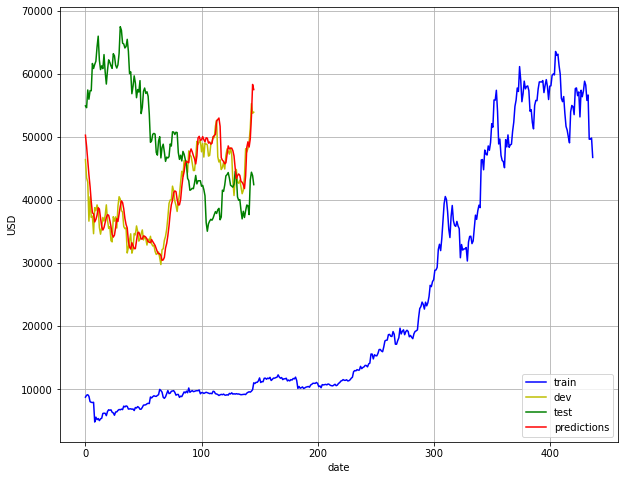

In [106]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': cv['est'], 
                       'y_cv': y_cv,
                       'date': cv['Time']})

ax = train.plot(y='Close', style='b-', grid=True)
ax = cv.plot(y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(y='Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

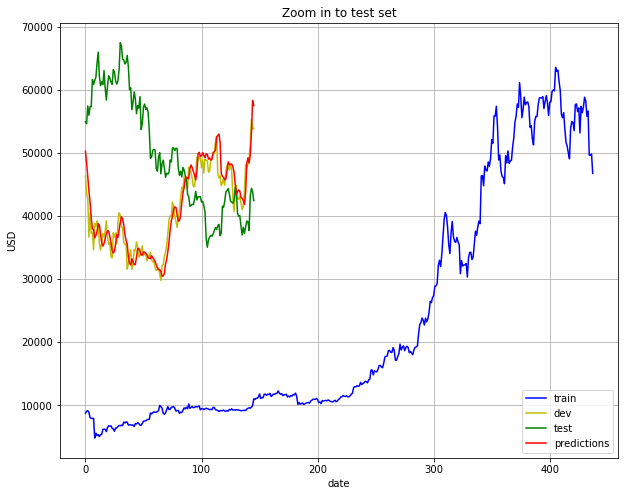

In [107]:
# Plot adjusted close over time, for test set only

rcParams['figure.figsize'] = 10, 8 # width 10, height 8
ax = train.plot( y='Close', style='b-', grid=True)
ax = cv.plot(y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(y='Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
# Limit the date to test set after it is proper
# ax.set_xlim([date(2017, 8, 1), date(2018, 5, 31)])
ax.set_title("Zoom in to test set")

In [108]:
# View a list of the features and their importance scores
imp = list(zip(train[feature_pool], model.feature_importances_))
imp.sort(key=lambda tup: tup[1]) 
imp[-10:]

[('No. of Active Addresses', 1.8458203e-06),
 ('Bitcoin_SVI', 3.0907602e-06),
 ('Close_std', 3.374613e-06),
 ('FundingRate', 3.908479e-06),
 ('No. of Unique Addresses', 4.4112644e-06),
 ('Close_mean', 3.696059e-05),
 ('Volume', 6.016464e-05),
 ('Cryptocurrency_SVI', 0.00013983792),
 ('Close', 0.09458678),
 ('Time', 0.90515673)]

## Tuning XGBoost - n_estimators (default=100) and max_depth (default=3)

In [97]:
param_label = 'n_estimators'
param_list = range(10, 310, 10)

param2_label = 'max_depth'
param2_list = [2, 3, 4, 5, 6, 7, 8, 9]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
#tic =time()
for param in param_list:
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Close_mean'],
                                     cv['Close_std'],
                                     seed=model_seed,
                                     n_estimators=param, 
                                     max_depth=param2, 
                                     learning_rate=learning_rate, 
                                     min_child_weight=min_child_weight, 
                                     subsample=subsample, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=gamma)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
#toc = time()
#print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   

,n_estimators,max_depth,rmse,mape_pct
0,10,2,2131.614061,4.134445
1,10,3,2147.780395,4.151574
2,10,4,2119.633994,4.106041
3,10,5,2124.019856,4.116431
4,10,6,2125.212205,4.116290
...,...,...,...,...
235,300,5,2170.014958,4.128594
236,300,6,2170.492853,4.127961
237,300,7,2170.306929,4.127230
238,300,8,2170.647021,4.127893


In [98]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
n_estimators_opt = temp['n_estimators'].values[0]
max_depth_opt = temp['max_depth'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
n_estimators_opt, max_depth_opt

min RMSE = 2119.634
optimum params = 


(10, 4)

In [99]:
# Get optimum value for param and param2, using MAPE
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['n_estimators'].values[0], temp['max_depth'].values[0]

min MAPE = 4.103%
optimum params = 


(20, 4)

## Tuning XGBoost - learning_rate(default=0.1) and min_child_weight(default=1)

In [100]:
param_label = 'learning_rate'
param_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]

param2_label = 'min_child_weight'
param2_list = range(5, 21, 1)

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
#tic = time()
for param in (param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Close_mean'],
                                     cv['Close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=param, 
                                     min_child_weight=param2, 
                                     subsample=subsample, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=gamma)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
#toc = time()
#print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   

,learning_rate,min_child_weight,rmse,mape_pct
0,0.001,5,2226.011433,4.285457
1,0.001,6,2226.006162,4.285450
2,0.001,7,2225.993397,4.285428
3,0.001,8,2226.156487,4.285578
4,0.001,9,2227.009110,4.286629
...,...,...,...,...
107,0.300,16,2162.662029,4.173747
108,0.300,17,2163.458258,4.158504
109,0.300,18,2158.637346,4.159880
110,0.300,19,2155.934478,4.113368


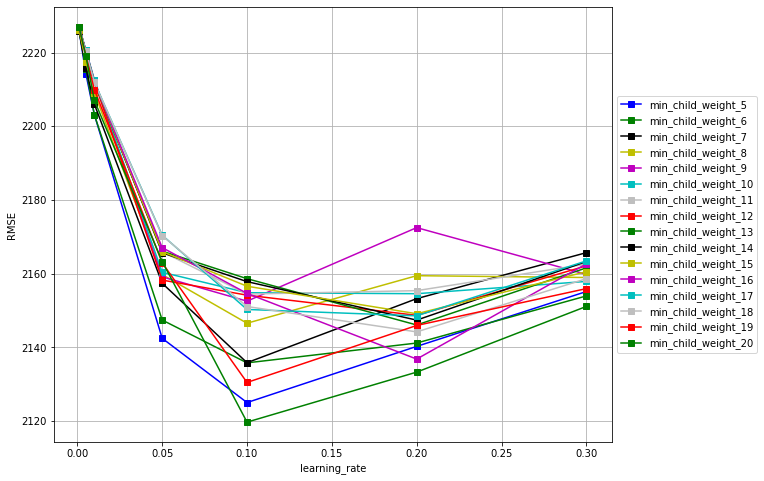

In [101]:
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")

plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [102]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
learning_rate_opt = temp['learning_rate'].values[0]
min_child_weight_opt = temp['min_child_weight'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
learning_rate_opt, min_child_weight_opt

min RMSE = 2119.699
optimum params = 


(0.1, 20)

In [103]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['learning_rate'].values[0], temp['min_child_weight'].values[0]

min MAPE = 4.097%
optimum params = 


(0.2, 20)

## Tuning XGBoost - subsample(default=1) and gamma(default=0)

In [115]:
param_label = 'subsample'
param_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

param2_label = 'gamma'
param2_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
#tic = time()
for param in (param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Close_mean'],
                                     cv['Close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=learning_rate_opt, 
                                     min_child_weight=min_child_weight_opt, 
                                     subsample=param, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=param2)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
#toc = time()
#print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   

,subsample,gamma,rmse,mape_pct
0,0.1,0.1,2286.044367,4.312544
1,0.1,0.2,2286.044367,4.312544
2,0.1,0.3,2286.044367,4.312544
3,0.1,0.4,2286.044367,4.312544
4,0.1,0.5,2286.044367,4.312544
...,...,...,...,...
95,1.0,0.6,2130.282366,4.125804
96,1.0,0.7,2116.599625,4.100689
97,1.0,0.8,2117.315173,4.097779
98,1.0,0.9,2114.721807,4.101633


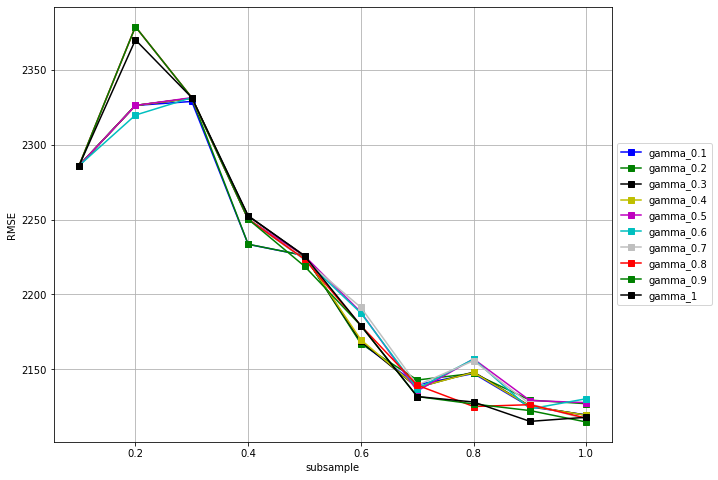

In [116]:
# Plot performance versus params
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")

plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [117]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
subsample_opt = temp['subsample'].values[0]
gamma_opt = temp['gamma'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
subsample_opt, gamma_opt

min RMSE = 2114.722
optimum params = 


(1.0, 0.9)

In [118]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['subsample'].values[0], temp['gamma'].values[0]

min MAPE = 4.098%
optimum params = 


(1.0, 0.8)

## Tuning XGBoost - colsample_bytree(default=1) and colsample_bylevel(default=1)

In [119]:


param_label = 'colsample_bytree'
param_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

param2_label = 'colsample_bylevel'
param2_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
#tic = time()
for param in (param_list):
#     print("param = " + str(param))
    
    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_cv_scaled, 
                                     y_cv, 
                                     cv['Close_mean'],
                                     cv['Close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=learning_rate_opt, 
                                     min_child_weight=min_child_weight_opt, 
                                     subsample=subsample_opt, 
                                     colsample_bytree=param, 
                                     colsample_bylevel=param2, 
                                     gamma=gamma_opt)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
#toc = time()
#print("Minutes taken = " + str((toc-tic)/60.0))
error_rate   



,colsample_bytree,colsample_bylevel,rmse,mape_pct
0,0.5,0.5,2331.683343,4.389714
1,0.5,0.6,2331.683343,4.389714
2,0.5,0.7,2352.518886,4.432183
3,0.5,0.8,2352.518886,4.432183
4,0.5,0.9,2339.416517,4.437695
5,0.5,1.0,2292.922416,4.358944
6,0.6,0.5,2338.503554,4.402936
7,0.6,0.6,2335.214983,4.416695
8,0.6,0.7,2335.214983,4.416695
9,0.6,0.8,2360.394549,4.462512


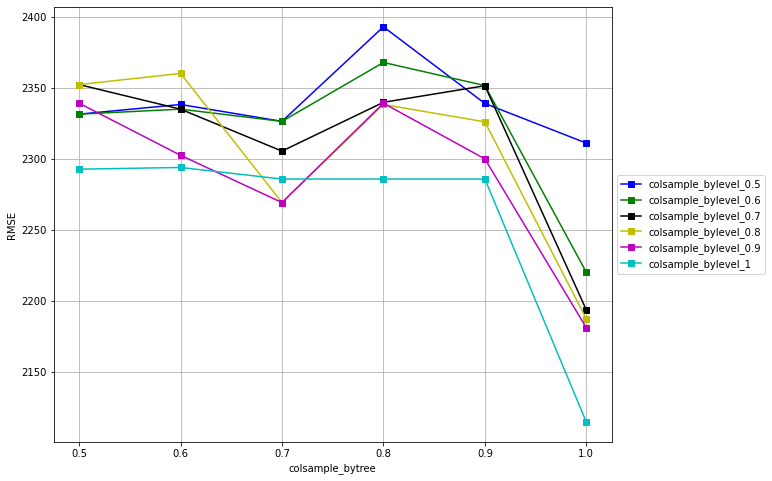

In [120]:
# Plot performance versus params
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [122]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
colsample_bytree_opt = temp['colsample_bytree'].values[0]
colsample_bylevel_opt = temp['colsample_bylevel'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
colsample_bytree_opt, colsample_bylevel_opt

min RMSE = 2114.722
optimum params = 


(1.0, 1.0)

In [123]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['colsample_bytree'].values[0], temp['colsample_bylevel'].values[0]

min MAPE = 4.102%
optimum params = 


(1.0, 1.0)

## Tuned params

In [124]:
d = {'param': ['n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', 'subsample', 'colsample_bytree', 'colsample_bylevel', 'gamma', 'rmse', 'mape_pct'],
     'original': [n_estimators, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree, colsample_bylevel, gamma, rmse_bef_tuning, mape_bef_tuning],
     'after_tuning': [n_estimators_opt, max_depth_opt, learning_rate_opt, min_child_weight_opt, subsample_opt, colsample_bytree_opt, colsample_bylevel_opt, gamma_opt, error_rate['rmse'].min(), error_rate['mape_pct'].min()]}
tuned_params = pd.DataFrame(d)
tuned_params = tuned_params.round(3)
tuned_params

,param,original,after_tuning
0,n_estimators,100.000,10.000
1,max_depth,3.000,4.000
2,learning_rate,0.100,0.100
3,min_child_weight,1.000,20.000
4,subsample,1.000,1.000
5,colsample_bytree,1.000,1.000
6,colsample_bylevel,1.000,1.000
7,gamma,0.000,0.900
8,rmse,2158.758,2114.722
9,mape_pct,4.149,4.102


## Final Model

In [126]:
rmse, mape, est = train_pred_eval_model(X_train_cv_scaled, 
                             y_train_cv_scaled, 
                             X_sample_scaled, 
                             y_sample, 
                             test['Close_mean'],
                             test['Close_std'],
                             seed=model_seed,
                             n_estimators=n_estimators_opt, 
                             max_depth=max_depth_opt, 
                             learning_rate=learning_rate_opt, 
                             min_child_weight=min_child_weight_opt, 
                             subsample=subsample_opt, 
                             colsample_bytree=colsample_bytree_opt, 
                             colsample_bylevel=colsample_bylevel_opt, 
                             gamma=gamma_opt)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

RMSE on test set = 2201.414
MAPE on test set = 3.342%


Text(0, 0.5, 'USD')

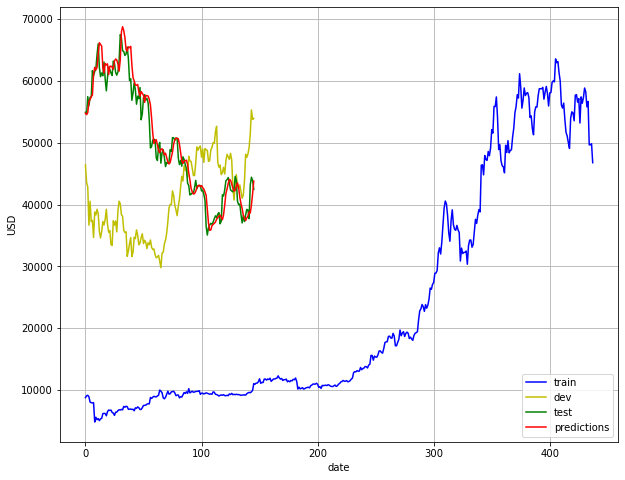

In [127]:
# Plot close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est, 
                       'y_sample': y_sample,
                       'date': test['Time']})

ax = train.plot(y='Close', style='b-', grid=True)
ax = cv.plot(y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(y='Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

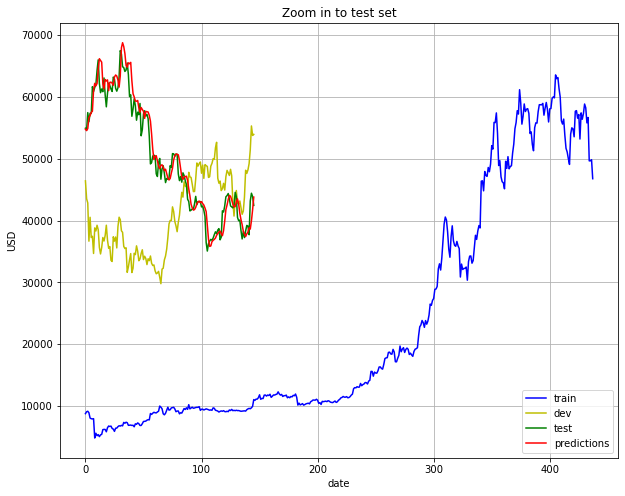

In [130]:
# Plot close over time, for test set only
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(y='Close', style='b-', grid=True)
ax = cv.plot(y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(y='Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
# Limit after test set is fixed
# ax.set_xlim([date(2018, 4, 1), date(2018, 11, 30)])
ax.set_title("Zoom in to test set")

Text(0, 0.5, 'USD')

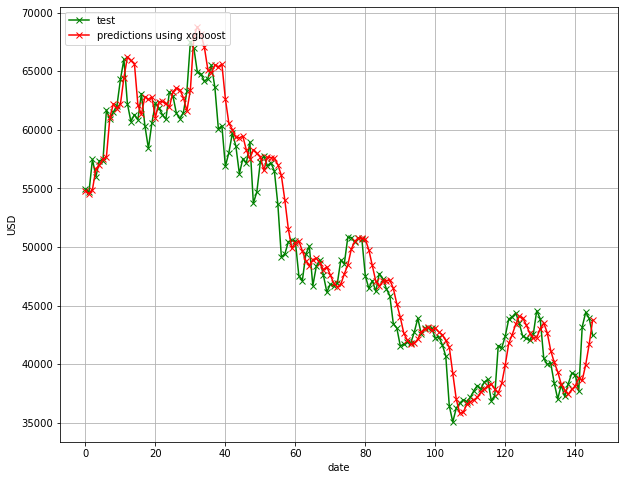

In [133]:
# Plot adjusted close over time, only for test set
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = test.plot(y='Close', style='gx-', grid=True)
ax = est_df.plot(y='est', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using xgboost'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
#ax.set_xlim([date(2018, 4, 23), date(2018, 11, 23)])
#ax.set_ylim([130, 155])

# Identifying Correlations 

<Figure size 1440x576 with 0 Axes>

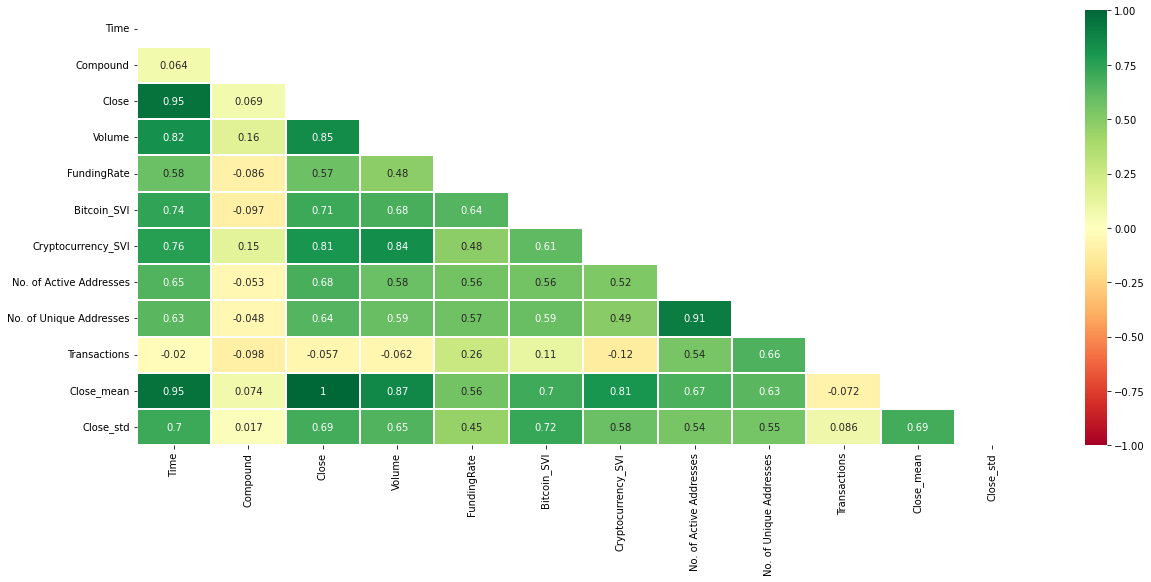

In [110]:
cols = X_train.columns 
corr = X_train[cols].corr()
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
#returns an array of given shape and type as given array, with zeros
mask = np.zeros_like(corr)

# Return the indices for the upper-triangle of arr and makes it true
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=1.5,annot = True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

# Export Data

In [111]:
X_test.to_csv('../data/X_test_scaled.csv', index=False)
X_train.to_csv('../data/X_train_scaled.csv', index=False)
y_train.to_csv('../data/Y_train_scaled.csv', index=False)
y_test.to_csv('../data/Y_test_scaled.csv', index=False)

NameError: name 'X_test' is not defined